**Import Library**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #vẽ hình
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, recall_score, roc_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV,StratifiedKFold 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from numpy import sqrt, argmax
from matplotlib import pyplot

**Load Dataset**

In [ ]:
df = pd.read_excel('K194141741.xlsx')

In [ ]:
df = df.iloc[:-1,:]
df

,Unnamed: 0,Identifier,Company Name,Country of Exchange,Exchange Name,TRBC Economic Sector Name,Total Assets,ROA,Total Current Assets,Total Debt,...,Cash Dividend Paid,Company Market Cap,Shares Held By Strategic Investors,Free Cash Flow,Total Revenue,Accounts Receivable,Accounts Payable,Total Common Shares Outstanding,Price close,EBIT
0,1.0,CHP.HM,Central Hydropower JSC,Vietnam,HOCHIMINH STOCK EXCHANGE,Utilities,3.272703e+12,0.071141,3.953595e+11,1.261980e+12,...,2.355239e+11,3.342263e+12,101679422.0,2.235527e+11,7.874475e+11,2.961941e+11,3.242776e+10,146912670.0,21432.43,4.202629e+11
1,2.0,POM.HM,Pomina Steel Corp,Vietnam,HOCHIMINH STOCK EXCHANGE,Basic Materials,1.268490e+13,0.017315,7.856386e+12,6.513491e+12,...,NaN,4.080663e+12,172835626.0,4.820811e+11,1.399925e+13,1.407948e+12,1.336917e+12,278543600.0,14650.00,3.492673e+11
2,3.0,V21.HN,Vinaconex 21 JSC,Vietnam,HANOI STOCK EXCHANGE,Industrials,3.355799e+11,0.009606,2.428419e+11,4.043566e+10,...,NaN,1.667971e+11,2549492.0,4.991456e+09,1.255000e+11,6.409691e+10,5.232899e+10,11999790.0,13900.00,6.638465e+09
3,4.0,LIG.HN,Licogi 13 JSC,Vietnam,HANOI STOCK EXCHANGE,Industrials,5.192755e+12,0.008785,3.480836e+12,1.469638e+12,...,0.000000e+00,1.242262e+12,29453147.0,-1.271862e+11,2.439778e+12,9.899979e+11,9.727359e+11,64034120.0,19400.00,1.464066e+11
4,5.0,MCC.HN,High Grade Brick Tile Corp,Vietnam,HANOI STOCK EXCHANGE,Basic Materials,9.295714e+10,0.023925,2.620235e+10,4.000000e+09,...,0.000000e+00,5.634320e+10,3875828.0,-2.091286e+09,4.095361e+10,6.293668e+09,1.047541e+10,4986120.0,10923.34,2.817838e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,748.0,DAG.HM,Dong A Plastic Group JSC,Vietnam,HOCHIMINH STOCK EXCHANGE,Consumer Cyclicals,2.030407e+12,0.004559,1.362451e+12,9.706947e+11,...,6.301148e+09,9.113111e+11,32750309.0,4.184887e+10,1.954159e+12,2.255883e+11,1.136889e+11,59562130.0,23616.51,1.634842e+10
748,749.0,PVL.HN,Viet Property Investment JSC,Vietnam,HANOI STOCK EXCHANGE,Real Estate,4.094021e+11,0.042380,1.598911e+11,0.000000e+00,...,NaN,8.000000e+11,1319500.0,1.674845e+10,2.374167e+10,-4.860675e+10,1.827808e+10,50000000.0,16420.07,1.287728e+10
749,750.0,CCI.HM,CuChi Commercial and Industrial Developing Inv...,Vietnam,HOCHIMINH STOCK EXCHANGE,Energy,6.891628e+11,0.047124,4.642601e+11,0.000000e+00,...,2.253379e+10,4.394047e+11,10909860.0,9.173168e+09,2.991550e+11,6.380239e+09,7.797998e+08,17541110.0,31300.00,5.161907e+11
750,751.0,PPP.HN,Phong Phu Pharmaceutical JSC,Vietnam,HANOI STOCK EXCHANGE,Healthcare,1.560300e+11,0.112094,7.077550e+10,2.000000e+09,...,5.970431e+09,1.548798e+11,6004556.0,1.591114e+10,1.332893e+11,1.044597e+10,1.637790e+10,8799990.0,NaN,NaN


In [ ]:
# Count the number of sectors in industry
df['TRBC Economic Sector Name'].value_counts()

Industrials               200
Basic Materials           134
Consumer Cyclicals         91
Real Estate                81
Consumer Non-Cyclicals     70
Financials                 56
Energy                     44
Utilities                  36
Healthcare                 21
Technology                 19
Name: TRBC Economic Sector Name, dtype: int64

In [ ]:
# Get non-financial firms 
list_industry = ['Industrials', 'Basic Materials', 'Consumer Cyclicals', 'Consumer Non-Cyclicals', 'Utilities', 'Technology', 'Energy']
df = df[df['TRBC Economic Sector Name'].isin(list_industry)]

In [ ]:
# Count the number of firms in 2 HOSE and HNX
df['Exchange Name'].value_counts()

HOCHIMINH STOCK EXCHANGE    299
HANOI STOCK EXCHANGE        295
Name: Exchange Name, dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'Identifier', 'Company Name', 'Country of Exchange',
       'Exchange Name', 'TRBC Economic Sector Name', 'Total Assets', 'ROA ',
       'Total Current Assets', 'Total Debt', 'Total Equity', 'Fixed Assets',
       'Cash from Operating Activities', 'Cash from Financing Activities',
       'Cash from Investing Activities', 'Price To Book Value Per Share ',
       'Depreciation', 'Total Current Liabilities', 'Retained Earnings ',
       'Cash', 'Cash Dividend Paid', 'Company Market Cap',
       'Shares Held By Strategic Investors', 'Free Cash Flow', 'Total Revenue',
       'Accounts Receivable', 'Accounts Payable',
       'Total Common Shares Outstanding', 'Price close', 'EBIT'],
      dtype='object')

In [ ]:
# Filter the necessary columns involved in calculating the independent features 
columns = ['Identifier', 'Exchange Name', 'TRBC Economic Sector Name', 'Total Assets', 'ROA ',
       'Total Current Assets', 'Total Debt', 'Total Equity', 'Fixed Assets',
       'Total Current Liabilities', 'Retained Earnings ',
       'Cash', 'Cash Dividend Paid', 'Company Market Cap', 'Free Cash Flow', 'Total Revenue',
       'Accounts Receivable', 'Accounts Payable', 'Total Common Shares Outstanding']
data = df[columns]

In [ ]:
# Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 0 to 749
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Identifier                       594 non-null    object 
 1   Exchange Name                    594 non-null    object 
 2   TRBC Economic Sector Name        594 non-null    object 
 3   Total Assets                     590 non-null    float64
 4   ROA                              583 non-null    float64
 5   Total Current Assets             590 non-null    float64
 6   Total Debt                       582 non-null    float64
 7   Total Equity                     590 non-null    float64
 8   Fixed Assets                     588 non-null    float64
 9   Total Current Liabilities        590 non-null    float64
 10  Retained Earnings                589 non-null    float64
 11  Cash                             590 non-null    float64
 12  Cash Dividend Paid    

**Data processing**

In [ ]:
# Fill na
col = ['Total Assets', 'ROA ', 'Total Current Assets', 'Total Equity', 'Fixed Assets',
       'Total Current Liabilities', 'Retained Earnings ',
       'Cash', 'Company Market Cap', 'Free Cash Flow', 'Total Revenue',
       'Accounts Receivable', 'Accounts Payable']
col1 = ['Total Debt', 'Cash Dividend Paid']

data[col] = data[col].fillna(data[col].mean())
data[col1] = data[col1].fillna(0)
data['Total Common Shares Outstanding'] = data['Total Common Shares Outstanding'].fillna(data['Total Common Shares Outstanding'].median())

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# Convert into correct type
data['Total Common Shares Outstanding'] = data['Total Common Shares Outstanding'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Check dataset after filling na and converting
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 0 to 749
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Identifier                       594 non-null    object 
 1   Exchange Name                    594 non-null    object 
 2   TRBC Economic Sector Name        594 non-null    object 
 3   Total Assets                     594 non-null    float64
 4   ROA                              594 non-null    float64
 5   Total Current Assets             594 non-null    float64
 6   Total Debt                       594 non-null    float64
 7   Total Equity                     594 non-null    float64
 8   Fixed Assets                     594 non-null    float64
 9   Total Current Liabilities        594 non-null    float64
 10  Retained Earnings                594 non-null    float64
 11  Cash                             594 non-null    float64
 12  Cash Dividend Paid    

In [ ]:
#Calculate independent variables
data['Cash'] = data['Cash']/data['Total Current Liabilities']
data['Current ratio'] = data['Total Current Assets']/data['Total Current Liabilities']
data['Capex'] = data['Fixed Assets']/data['Total Assets']
data['Leverage'] = data['Total Debt']/data['Total Assets']
data['D/E'] = data['Total Debt']/data['Total Equity']
data['Firm size'] = np.log(data['Total Assets'])
data['RETA'] = data['Retained Earnings ']/data['Total Assets']
data['FCF per share'] = data['Free Cash Flow']/data['Total Common Shares Outstanding']
data['Profit margin'] = (data['ROA ']*data['Total Assets'])/data['Total Revenue']
data['DSO'] = data['Accounts Receivable']/(data['Total Revenue']/365)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
# Encoding dependent variable
data.loc[data['Cash Dividend Paid'] > 0, 'Paying dividend'] = 1
data.loc[data['Cash Dividend Paid'] <= 0, 'Paying dividend'] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
# Create dataframe
col_all = ['ROA ', 'Cash', 'Current ratio', 'Capex', 'Leverage', 'D/E', 'Firm size', 'RETA', 'FCF per share', 'Profit margin', 'DSO', 'Paying dividend']
explanatory_feature = ['ROA ', 'Cash', 'Current ratio', 'Capex', 'Leverage', 'D/E', 'Firm size', 'RETA', 'FCF per share', 'Profit margin', 'DSO']
target = ['Paying dividend']
data = data[col_all]

In [ ]:
# Correlation matrix
matrix = data[explanatory_feature].corr()

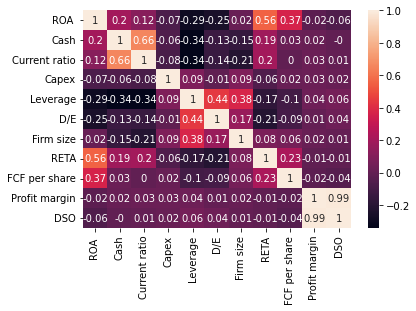

In [ ]:
# Plot correlation matrix
sns.heatmap(matrix.round(2), annot=True)
plt.show()

In [ ]:
data[col_all].corr()

,ROA,Cash,Current ratio,Capex,Leverage,D/E,Firm size,RETA,FCF per share,Profit margin,DSO,Paying dividend
ROA,1.000000,0.197762,0.123807,-0.065471,-0.293180,-0.249402,0.021976,0.558372,0.370342,-0.015664,-0.057618,0.297210
Cash,0.197762,1.000000,0.658139,-0.062329,-0.335517,-0.131722,-0.145915,0.190160,0.029757,0.019874,-0.003427,0.036011
Current ratio,0.123807,0.658139,1.000000,-0.082712,-0.343159,-0.135777,-0.207885,0.195524,0.004367,0.026085,0.012613,-0.046080
Capex,-0.065471,-0.062329,-0.082712,1.000000,0.089985,-0.011908,0.090547,-0.055552,0.023449,0.031299,0.024022,-0.030124
Leverage,-0.293180,-0.335517,-0.343159,0.089985,1.000000,0.436888,0.377045,-0.174079,-0.098800,0.044050,0.057458,-0.120291
D/E,-0.249402,-0.131722,-0.135777,-0.011908,0.436888,1.000000,0.165267,-0.212761,-0.087014,0.010258,0.039851,-0.114232
Firm size,0.021976,-0.145915,-0.207885,0.090547,0.377045,0.165267,1.000000,0.081426,0.057686,0.017551,0.006484,0.095639
RETA,0.558372,0.190160,0.195524,-0.055552,-0.174079,-0.212761,0.081426,1.000000,0.229278,-0.007593,-0.010289,0.327327
FCF per share,0.370342,0.029757,0.004367,0.023449,-0.098800,-0.087014,0.057686,0.229278,1.000000,-0.020360,-0.037697,0.066278
Profit margin,-0.015664,0.019874,0.026085,0.031299,0.044050,0.010258,0.017551,-0.007593,-0.020360,1.000000,0.988927,0.060262


In [ ]:
# Descriptive statistics of explanatory features after eliminating "Profit margin" and "DSO" 
explanatory_features = ['ROA ', 'Cash', 'Current ratio', 'Capex', 'Leverage', 'D/E', 'Firm size', 'RETA', 'FCF per share']
data[explanatory_features].describe()

,ROA,Cash,Current ratio,Capex,Leverage,D/E,Firm size,RETA,FCF per share
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,0.055573,0.904468,2.573264,0.261925,0.215318,0.871100,27.557860,0.069279,1160.129524
std,0.074659,2.042584,3.978887,0.330885,0.184415,2.255323,1.618848,0.145943,3229.121111
min,-0.255507,-0.007250,0.033829,0.000000,0.000000,0.000000,23.636331,-1.075446,-17316.031192
25%,0.014641,0.090711,1.146372,0.061577,0.034995,0.057592,26.418246,0.025094,-51.265394
50%,0.039981,0.299411,1.453585,0.178920,0.185025,0.371069,27.513169,0.064008,834.644353
75%,0.081675,0.748361,2.388351,0.366220,0.349911,1.110378,28.499764,0.132464,2234.599531
max,0.449104,21.287109,39.059628,4.919161,0.954313,40.341193,32.814132,0.722730,27174.541064


**Visualize**

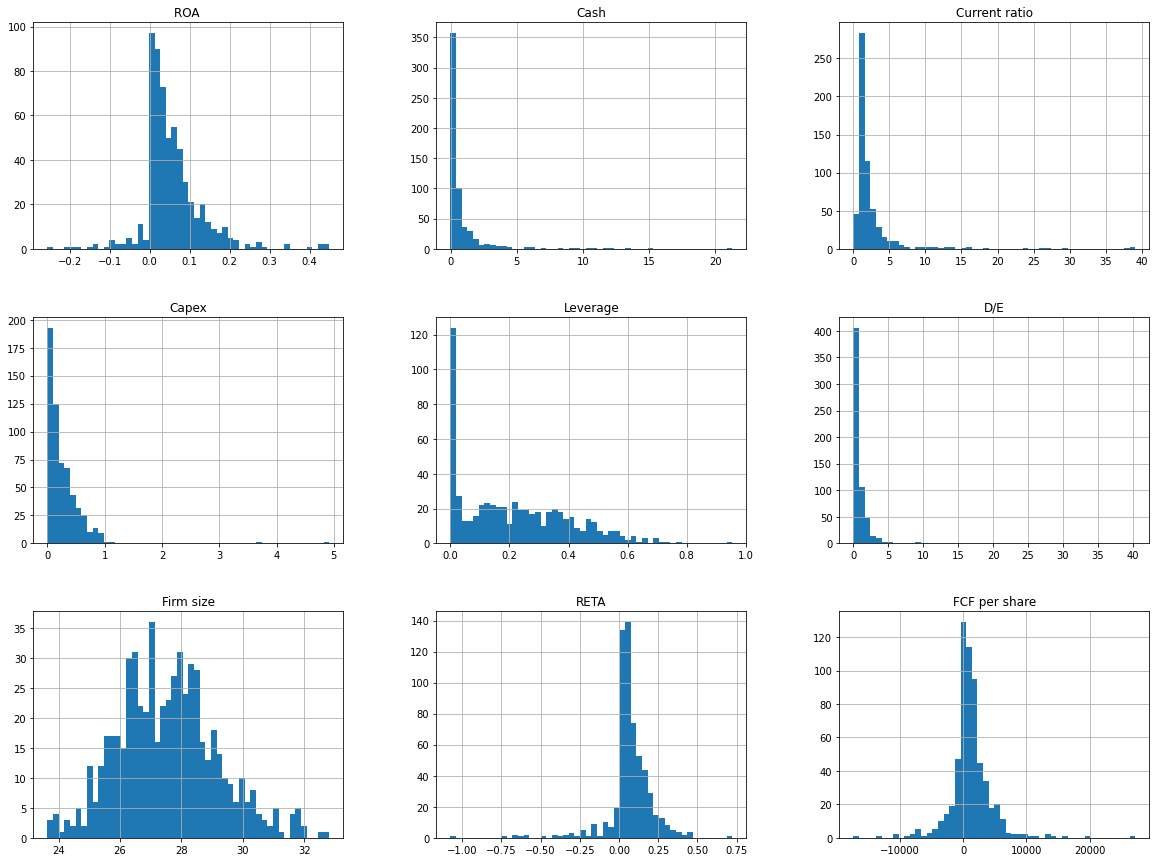

In [ ]:
%matplotlib inline
#Creating histogram for numerical attributes
data[explanatory_features].hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# Count the number of each class of the target variable
data['Paying dividend'].value_counts()

1.0    394
0.0    200
Name: Paying dividend, dtype: int64

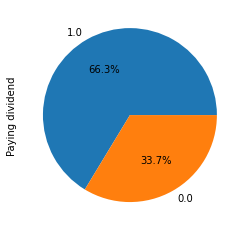

In [ ]:
# Plot pie chart to see imbalance between 2 classes of target variable
data['Paying dividend'].value_counts().plot.pie(autopct='%1.1f%%')

In [ ]:
X = data[explanatory_features]
y = data[target]

In [ ]:
# Split train-test data in dataset with test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
# Scale features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Build model with Logistic Regression**

In [ ]:
# Fit a model 
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [ ]:
# Predict probabilities
y_pred = model.predict(X_test)

In [ ]:
# Report result of test data following model
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Classification report
print(classification_report(y_test,y_pred))
print('Logistic accuracy: ', accuracy_score(y_test, y_pred))

[[ 7 35]
 [ 1 76]]
              precision    recall  f1-score   support

         0.0       0.88      0.17      0.28        42
         1.0       0.68      0.99      0.81        77

    accuracy                           0.70       119
   macro avg       0.78      0.58      0.54       119
weighted avg       0.75      0.70      0.62       119

Logistic accuracy:  0.6974789915966386


*Adjust model with new threshold*

Best Threshold=0.673993, G-Mean=0.727


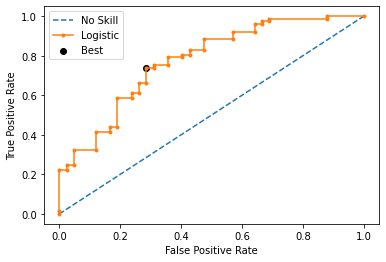

In [ ]:
# Keep probabilities for the positive outcome only
y_pred1 = model.predict_proba(X_test)
y_pred1 = y_pred1[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# Test with new threshold
threshold = 0.673993
y_pred2 = (model.predict_proba(X_test)[:, 1] > threshold).astype('float')
accuracy = accuracy_score(y_test, y_pred2)
# Confusion matrix
cm1 = confusion_matrix(y_test, y_pred2)
print(cm1)
# Classification report
print(classification_report(y_test,y_pred2))
print("Logistic Accuracy: %.2f%%" % (accuracy * 100.0))

[[30 12]
 [20 57]]
              precision    recall  f1-score   support

         0.0       0.60      0.71      0.65        42
         1.0       0.83      0.74      0.78        77

    accuracy                           0.73       119
   macro avg       0.71      0.73      0.72       119
weighted avg       0.75      0.73      0.74       119

Logistic Accuracy: 73.11%


**Build model with KNN**

In [ ]:
# Fit a model with default n_neighbors = 5
model1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
# Predict probabilities
y_pred3 = model1.predict(X_test)

In [ ]:
# Report result of test data following model
cm = confusion_matrix(y_test, y_pred3)
accuracy1 = accuracy_score(y_test, y_pred3)
# Confusion matrix
print(cm)
# Classification report
print(classification_report(y_test,y_pred3))
print("KNN Accuracy: %.2f%%" % (accuracy1 * 100.0))

[[14 28]
 [ 5 72]]
              precision    recall  f1-score   support

         0.0       0.74      0.33      0.46        42
         1.0       0.72      0.94      0.81        77

    accuracy                           0.72       119
   macro avg       0.73      0.63      0.64       119
weighted avg       0.73      0.72      0.69       119

KNN Accuracy: 72.27%


*Adjust model with new k*

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Maximum accuracy:- 0.7478991596638656 at K = 5


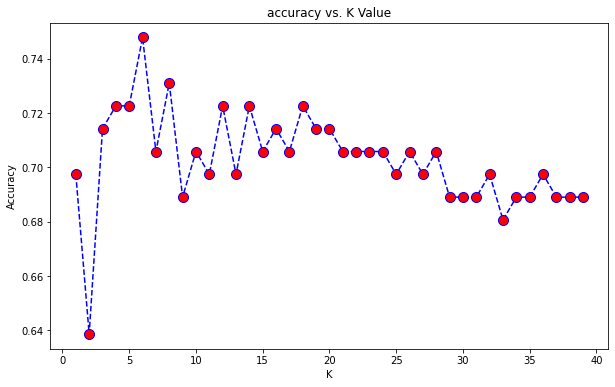

In [ ]:
acc = []
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print('Maximum accuracy:-',max(acc),'at K =',acc.index(max(acc)))

*Because KNN has default k = 5, model will not change k and remain.*

**Build model with XG Boost**

In [ ]:
# Fit a model
model2 = XGBClassifier() 
model2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier()

In [ ]:
# Predict probabilities
y_pred4 = model2.predict(X_test)

In [ ]:
# Report result of test data following model
cm = confusion_matrix(y_test, y_pred4)
accuracy2 = accuracy_score(y_test, y_pred4)
# Confusion matrix
print(cm)
# Classification report
print(classification_report(y_test,y_pred4))
print("XG Boost Accuracy: %.2f%%" % (accuracy2 * 100.0))

[[16 26]
 [ 5 72]]
              precision    recall  f1-score   support

         0.0       0.76      0.38      0.51        42
         1.0       0.73      0.94      0.82        77

    accuracy                           0.74       119
   macro avg       0.75      0.66      0.67       119
weighted avg       0.74      0.74      0.71       119

XG Boost Accuracy: 73.95%


*Adjust model*

In [ ]:
# Grid Search 
learning_rate = [0.01, 0.1, 0.2] 
max_depth = [6]
booster = ['gbtree']
n_estimators = [100]
nthread = [6]
min_child_weight = [1,5,10,20,30]

param_grid = dict(min_child_weight=min_child_weight, nthread=nthread, learning_rate=learning_rate, max_depth=max_depth, booster=booster, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7) 
grid_search = GridSearchCV(model2, param_grid, scoring='accuracy', n_jobs = 10, cv=kfold) 
grid_result = grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Summarize results   
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score'] 
stds = grid_result.cv_results_['std_test_score'] 
params = grid_result.cv_results_['params']

Best: 0.764211 using {'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 10, 'n_estimators': 100, 'nthread': 6}


In [ ]:
# Evaluate of predictions 
model3 = grid_search.best_estimator_
y_pred5 = model3.predict(X_test)

In [ ]:
# Report result of test data following model
cm = confusion_matrix(y_test, y_pred5)
accuracy3 = accuracy_score(y_test, y_pred5)
# Confusion matrix
print(cm)
accuracy_score(y_test, y_pred5)
# Classification report
print(classification_report(y_test,y_pred5))
print("XG Boost Accuracy: %.2f%%" % (accuracy3 * 100.0))

[[14 28]
 [ 4 73]]
              precision    recall  f1-score   support

         0.0       0.78      0.33      0.47        42
         1.0       0.72      0.95      0.82        77

    accuracy                           0.73       119
   macro avg       0.75      0.64      0.64       119
weighted avg       0.74      0.73      0.70       119

XG Boost Accuracy: 73.11%
